<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/ParticleSimulator3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import time
import numpy as np
from IPython.display import clear_output
from scipy.spatial import KDTree
import random

class Particle:
    def __init__(self, x, y, z, vx, vy, vz, color):
        self.x = x
        self.y = y
        self.z = z
        self.vx = vx
        self.vy = vy
        self.vz = vz
        self.color = color

    def move(self):
        self.x += self.vx
        self.y += self.vy
        self.z += self.vz

class Simulator:
    def __init__(self, width, height, depth):
        self.width = width
        self.height = height
        self.depth = depth
        self.particles = []
        self.collision_radius = 1.5

    def add_particle(self, particle):
        self.particles.append(particle)

    def create_cube(self, start_x, start_y, start_z, width, height, depth, speed_range, color, density=1.0):
        particles = []

        for x in range(start_x, start_x + width):
            for y in range(start_y, start_y + height):
                for z in range(start_z, start_z + depth):
                    if random.random() <= density:
                        vx = random.uniform(speed_range[0], speed_range[1])
                        vy = random.uniform(speed_range[0], speed_range[1])
                        vz = random.uniform(speed_range[0], speed_range[1])
                        particles.append(Particle(x, y, z, vx, vy, vz, color))

        return particles

    def kdtree_collisions(self):
        positions = np.array([[p.x, p.y, p.z] for p in self.particles])
        tree = KDTree(positions)
        collision_pairs = tree.query_pairs(self.collision_radius)

        for i, j in collision_pairs:
            p1, p2 = self.particles[i], self.particles[j]
            distance = np.sqrt((p1.x - p2.x)**2 + (p1.y - p2.y)**2 + (p1.z - p2.z)**2)
            if distance <= 1.0:
                p1.vx, p2.vx = p2.vx, p1.vx
                p1.vy, p2.vy = p2.vy, p1.vy
                p1.vz, p2.vz = p2.vz, p1.vz

    def simulate_step(self):
        for p in self.particles:
            p.move()

            # Отражение от границ
            if p.x <= 0 or p.x >= self.width - 1:
                p.vx = -p.vx
            if p.y <= 0 or p.y >= self.height - 1:
                p.vy = -p.vy
            if p.z <= 0 or p.z >= self.depth - 1:
                p.vz = -p.vz

        self.kdtree_collisions()

def print_3d_projections(simulator):
    color_symbols = {
        'красный': '🔴',
        'синий': '🔵'
    }

    # Создаем три проекции: XY, XZ, YZ
    xy_proj = [['· ' for _ in range(simulator.width)] for _ in range(simulator.height)]
    xz_proj = [['· ' for _ in range(simulator.width)] for _ in range(simulator.depth)]
    yz_proj = [['· ' for _ in range(simulator.height)] for _ in range(simulator.depth)]

    for p in simulator.particles:
        x, y, z = int(round(p.x)), int(round(p.y)), int(round(p.z))
        symbol = color_symbols.get(p.color, '⚪')

        # XY проекция (вид сверху)
        if 0 <= x < simulator.width and 0 <= y < simulator.height:
            xy_proj[y][x] = symbol

        # XZ проекция (вид спереди)
        if 0 <= x < simulator.width and 0 <= z < simulator.depth:
            xz_proj[z][x] = symbol

        # YZ проекция (вид сбоку)
        if 0 <= y < simulator.height and 0 <= z < simulator.depth:
            yz_proj[z][y] = symbol

    print("XY проекция (вид сверху):")
    for row in xy_proj:
        print(''.join(row))

    print("\nXZ проекция (вид спереди):")
    for row in xz_proj:
        print(''.join(row))

    print("\nYZ проекция (вид сбоку):")
    for row in yz_proj:
        print(''.join(row))

def main():
    width, height, depth = 10, 10, 10

    sim = Simulator(width, height, depth)

    body_cube = sim.create_cube(
        start_x=3, start_y=3, start_z=3,
        width=5, height=3, depth=3,
        speed_range=(-0.01, 0.01),
        color='синий',
        density=1
    )

    fire_cube = sim.create_cube(
        start_x=0, start_y=0, start_z=8,
        width=10, height=10, depth=2,
        speed_range=(-0.5, 0.5),
        color='красный',
        density=0.8
    )

    for particle in fire_cube + body_cube:
        sim.add_particle(particle)

    try:
        for _ in range(1000):
            clear_output(wait=True)
            print_3d_projections(sim)
            sim.simulate_step()
            time.sleep(1)

    except KeyboardInterrupt:
        print('\nСимуляция остановлена')

if __name__ == "__main__":
    main()

XY проекция (вид сверху):
🔴🔴🔴🔴🔴· 🔴🔴🔴🔴
🔴🔴🔴🔴· 🔴🔴🔴🔴🔴
🔴🔴🔴🔴🔴🔴🔴· 🔴🔴
🔴🔴🔴🔵🔵🔵🔵🔵🔴🔴
🔴🔴🔴🔵🔵🔵🔵🔵🔴🔴
🔴🔴🔴🔵🔵🔵🔵🔵🔴· 
🔴🔴· 🔴· 🔴🔴· · · 
🔴🔴🔴🔴🔴🔴🔴· 🔴🔴
· 🔴· 🔴· 🔴🔴🔴· 🔴
🔴🔴🔴🔴🔴🔴🔴🔴🔴🔴

XZ проекция (вид спереди):
· · · · · · · · · · 
· · · · · · · · · · 
· · · · · · · · · · 
· · · 🔵🔵🔵🔵🔵· · 
· · · 🔵🔵🔵🔵🔵· · 
· · · 🔵🔵🔵🔵🔵· · 
· · · · · · · · · · 
· · 🔴🔴🔴· 🔴🔴🔴🔴
🔴🔴🔴🔴🔴🔴🔴🔴🔴🔴
🔴🔴🔴🔴🔴🔴🔴🔴🔴🔴

YZ проекция (вид сбоку):
· · · · · · · · · · 
· · · · · · · · · · 
· · · · · · · · · · 
· · · 🔵🔵🔵· · · · 
· · · 🔵🔵🔵· · · · 
· · · 🔵🔵🔵· · · · 
· · · · · · · · · · 
🔴🔴🔴· · 🔴🔴· 🔴🔴
🔴🔴🔴🔴🔴🔴🔴🔴🔴🔴
🔴🔴🔴🔴🔴🔴🔴🔴🔴🔴

Симуляция остановлена


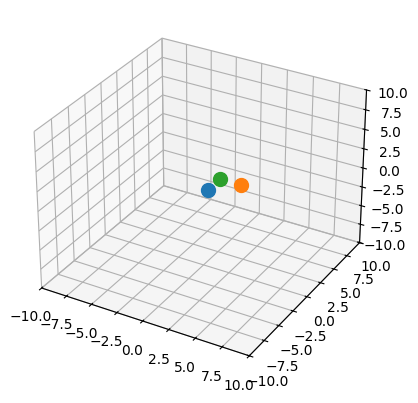

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import random
import time

def minimal_working_version():
    points = [[0, 0, 0], [2, 0, 0], [0, 2, 0]]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    plt.ion()

    try:
        while True:
            # Обновляем координаты
            for point in points:
                point[0] += random.choice([-1, 1])
                point[1] += random.choice([-1, 1])
                point[2] += random.choice([-1, 1])

            # Очищаем и перерисовываем
            ax.clear()
            ax.set_xlim(-10, 10)
            ax.set_ylim(-10, 10)
            ax.set_zlim(-10, 10)

            for i, point in enumerate(points):
                ax.scatter(point[0], point[1], point[2], s=100)

            plt.draw()
            plt.pause(1)

    except:
        plt.close()

if __name__ == "__main__":
    minimal_working_version()

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def create_3d_animation():
    # Инициализация точек
    points = np.array([[0, 0, 0], [2, 0, 0], [0, 2, 0]], dtype=float)

    # Создание фигуры и 3D оси
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Настройка осей
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-5, 5)
    ax.set_title('3D Points Animation')

    # Инициализация scatter plot
    scat = ax.scatter(points[:, 0], points[:, 1], points[:, 2],
                      s=100, c=['red', 'blue', 'green'])

    def update(frame):
        nonlocal points
        # Добавляем случайное движение
        points += np.random.uniform(-0.3, 0.3, points.shape)

        # Обновляем данные
        scat._offsets3d = (points[:, 0], points[:, 1], points[:, 2])

        # Вращаем камеру
        ax.view_init(elev=20, azim=frame)

        return scat,

    # Создание анимации
    anim = FuncAnimation(fig, update, frames=60, interval=60, blit=False)
    plt.close()

    return anim

# Создаем и отображаем анимацию
animation = create_3d_animation()
HTML(animation.to_html5_video())